Red Wine Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

White Wine Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data col

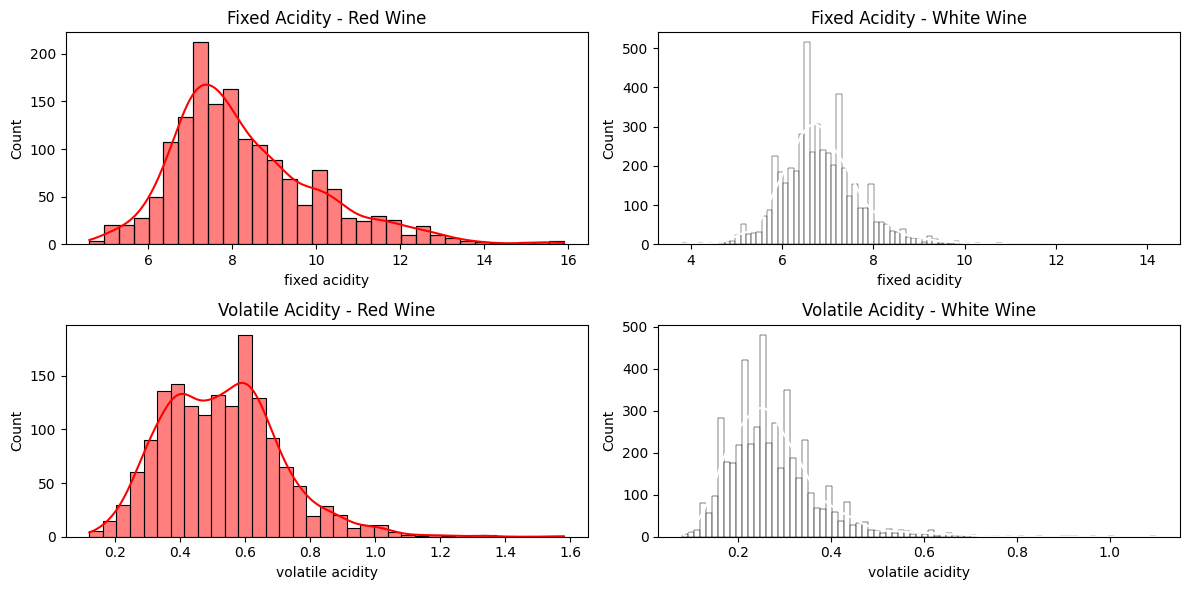

Training Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}
Best mean squared error on validation set for Random Forest: 0.396599243640569
Mean squared error on test set for Random Forest: 0.38775181317359064

Training SVR...
Best parameters for SVR: {'C': 10, 'gamma': 'scale'}
Best mean squared error on validation set for SVR: 0.56376278672802
Mean squared error on test set for SVR: 0.5707588235050213

Training Neural Network...
Best parameters for Neural Network: {'alpha': 0.01, 'hidden_layer_sizes': (100,)}
Best mean squared error on validation set for Neural Network: 0.5420077011137167
Mean squared error on test set for Neural Network: 0.5283972025541893

Neural Network Feature Importance:
fixed acidity: 0.036882742349122005
volatile acidity: 0.013381653846566659
citric acid: -0.017920987921635247
residual sugar: 0.01406394106317675
chlorides: -0.003380739559135539
free sulfur dioxide: 0.01497920346537836
total sulfur dioxide: 0.0430653317018

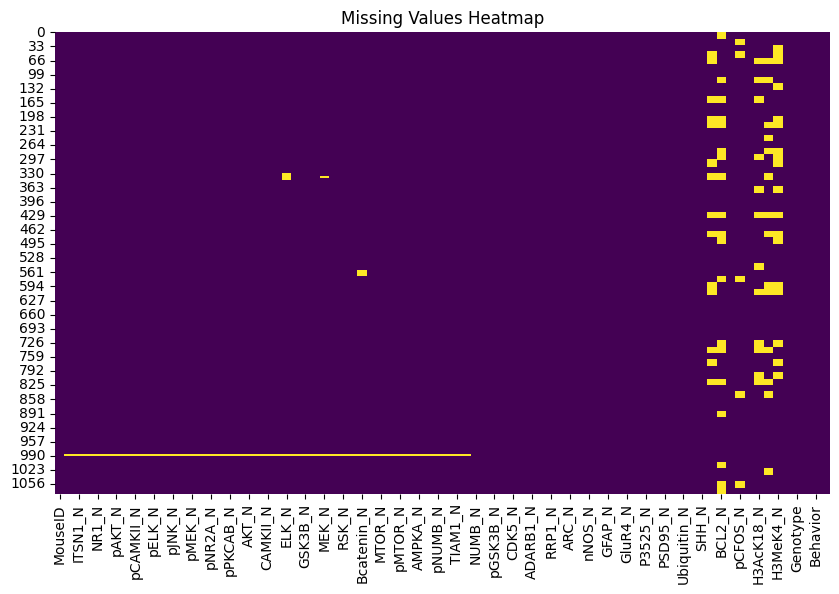

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(



Missing Values After Imputation:
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Genotype     0
Length: 78, dtype: int64


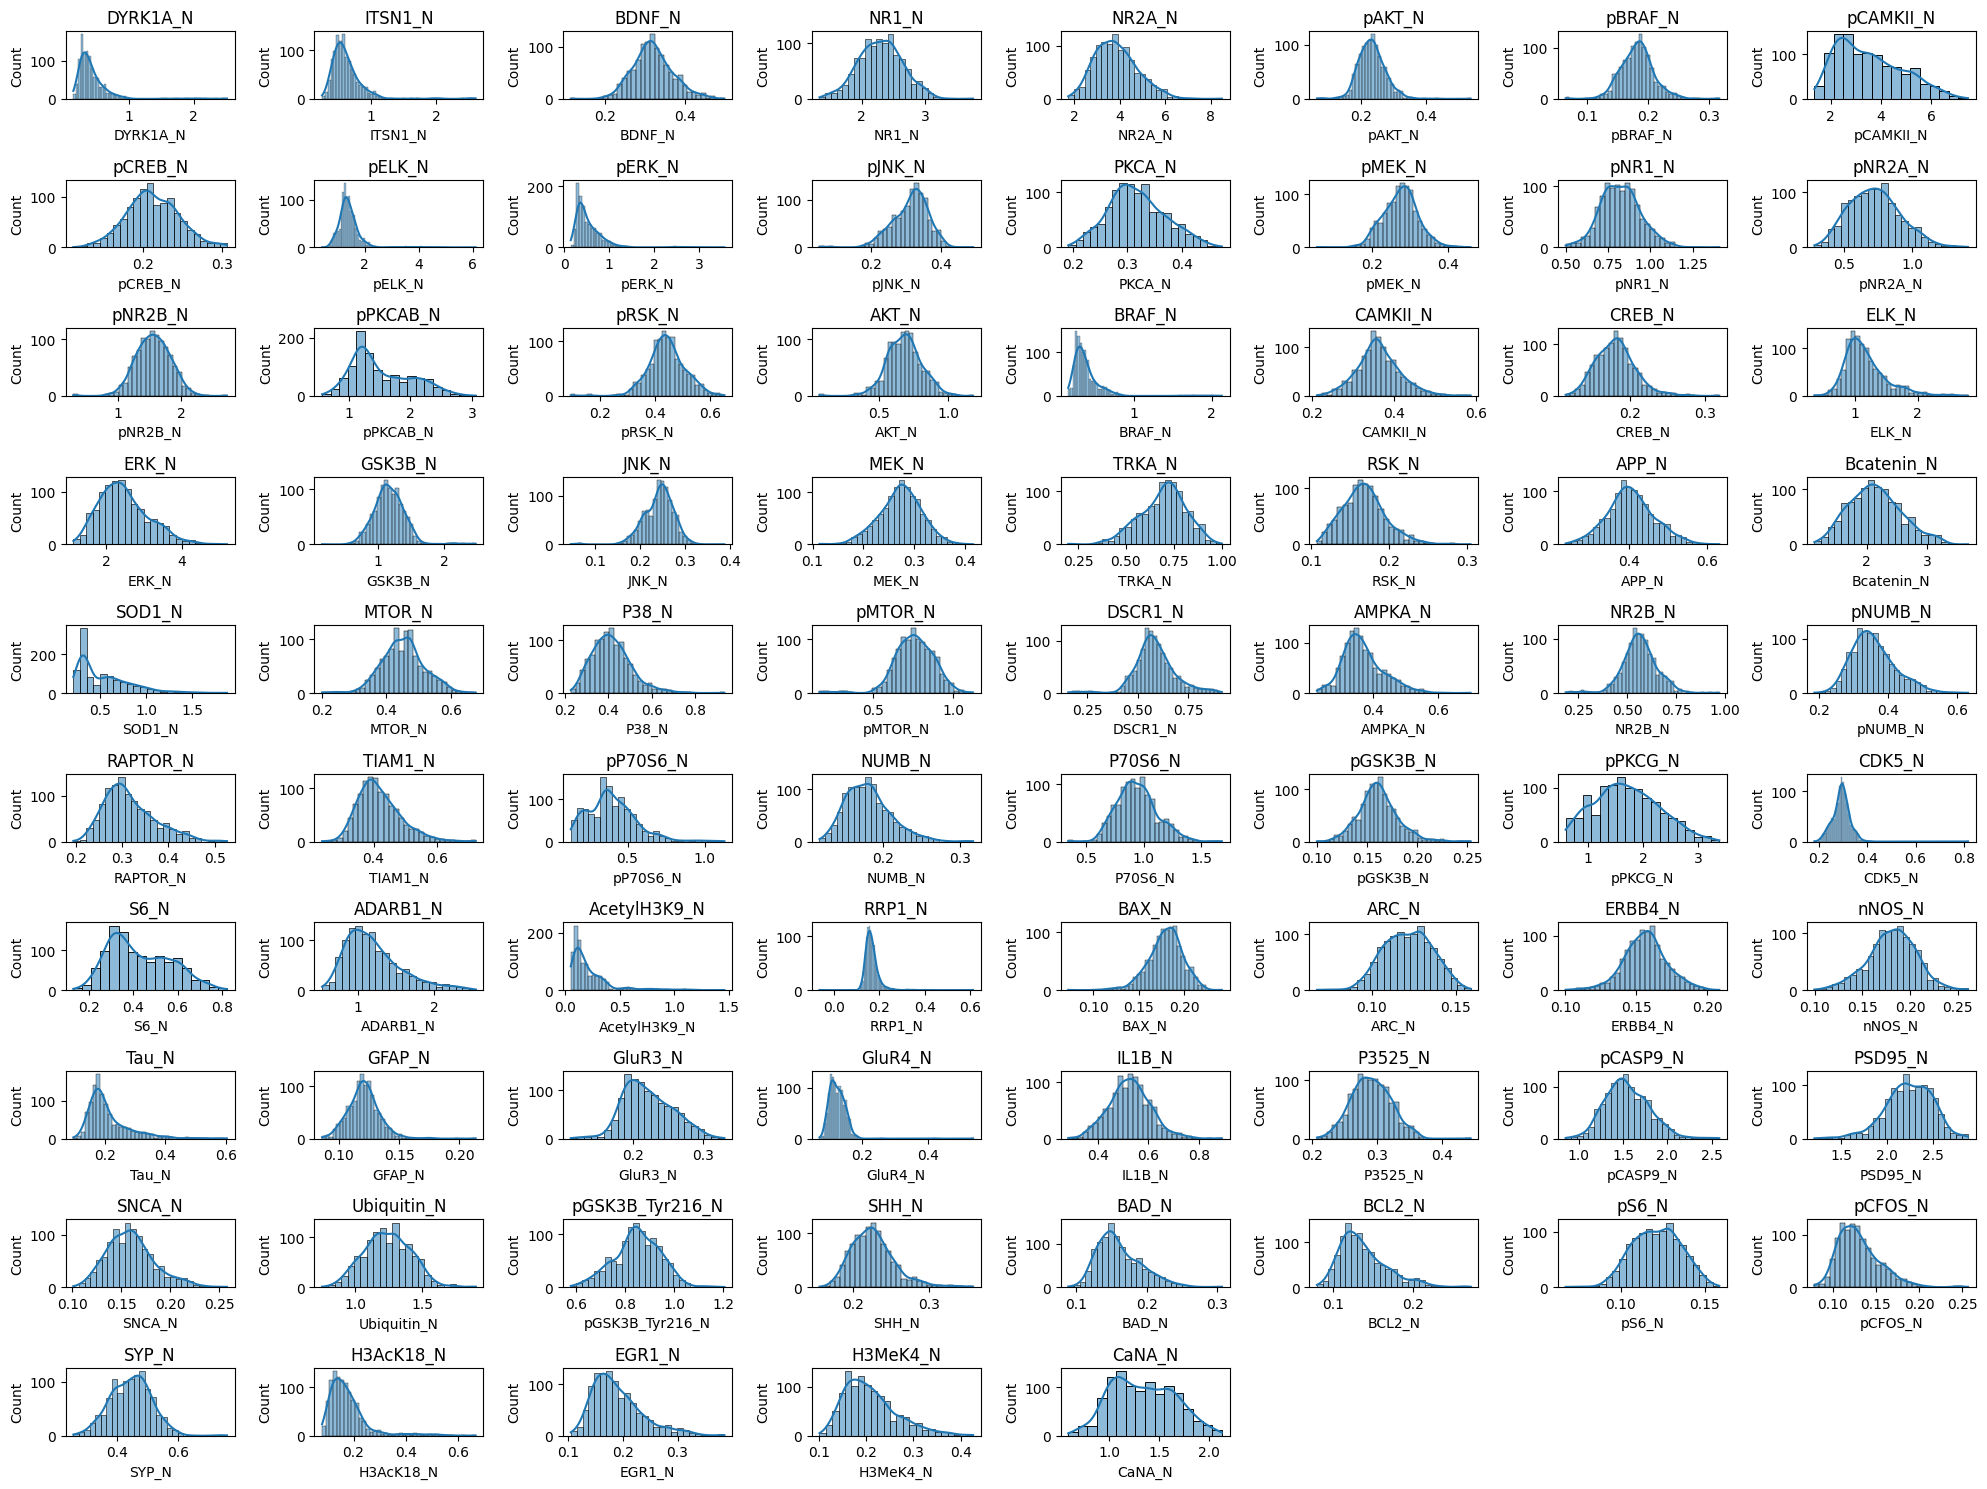

Random Forest:
Best parameters: {'max_depth': None, 'n_estimators': 200}
Accuracy: 0.9819819819819819


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# I request the TA's to upload the .xls and .csv files for evaluation of the code

# Load the datasets
red_wine_data = pd.read_csv('winequality-red.csv', sep=';')  # Load red wine dataset
white_wine_data = pd.read_csv('winequality-white.csv', sep=';')  # Load white wine dataset

# Display basic information about the datasets
print("Red Wine Dataset:")
print(red_wine_data.info())  # Display information about red wine dataset

print("\nWhite Wine Dataset:")
print(white_wine_data.info())  # Display information about white wine dataset

# The syntax is taken from the ChatGPT and changes has been made
# Visualize the distributions of some key features

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(red_wine_data['fixed acidity'], color='red', kde=True)
plt.title('Fixed Acidity - Red Wine')
plt.subplot(2, 2, 2)
sns.histplot(white_wine_data['fixed acidity'], color='white', kde=True)
plt.title('Fixed Acidity - White Wine')
plt.subplot(2, 2, 3)
sns.histplot(red_wine_data['volatile acidity'], color='red', kde=True)
plt.title('Volatile Acidity - Red Wine')
plt.subplot(2, 2, 4)
sns.histplot(white_wine_data['volatile acidity'], color='white', kde=True)
plt.title('Volatile Acidity - White Wine')
plt.tight_layout()
plt.show()

# This part of the code is taken from the ChatGPT and changes has been made
# Pre-processing (if needed)
# For demonstration, let's concatenate the datasets
red_wine_data['wine_type'] = 'red'  # Create a new column indicating wine type (red)
white_wine_data['wine_type'] = 'white'  # Create a new column indicating wine type (white)
combined_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)  # Concatenate both datasets

# Shuffle the combined dataset
combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

# The syntax is taken from the ChatGPT and changes has been made
# Splitting data into features and target
X = combined_data.drop(['quality', 'wine_type'], axis=1)  # Features
y = combined_data['quality']  # Target

# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use X_train, X_test, y_train, y_test for training and testing your regression mode

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
# Define models
models = {
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Neural Network': MLPRegressor(max_iter=1000)
}
# The syntax is taken from the ChatGPT and changes has been made
# Define hyperparameters for tuning
parameters = {
    'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]},
    'SVR': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale']},
    'Neural Network': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]}
}
# This part of the code is taken from the ChatGPT and changes has been made
# Train, validate, and test the models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, parameters[model_name], cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Validate the model
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best mean squared error on validation set for {model_name}: {-grid_search.best_score_}")

    # Test the model
    y_pred_test = best_model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    print(f"Mean squared error on test set for {model_name}: {mse_test}\n")

nn_weights_input_hidden = best_model.coefs_[0]  # weights connecting input layer to hidden layer
nn_feature_importance = nn_weights_input_hidden.mean(axis=1)  # Taking mean of weights
# The syntax is taken from the ChatGPT and changes has been made
print("Neural Network Feature Importance:")
for i, (feature, importance) in enumerate(zip(X.columns, nn_feature_importance)):
    print(f"{feature}: {importance}")
print()

# Testing the model for red wine data using the model trained on white wine data
# This part of the code is taken from the ChatGPT and changes has been made
y_pred_red_from_white = best_model.predict(red_wine_data.drop(['quality', 'wine_type'], axis=1))
mse_red_from_white = mean_squared_error(red_wine_data['quality'], y_pred_red_from_white)
print(f"Mean squared error on red wine data using model trained on white wine data: {mse_red_from_white}")
# Testing the model for white wine data using the model trained on red wine data
# The syntax is taken from the ChatGPT and changes has been made
y_pred_white_from_red = best_model.predict(white_wine_data.drop(['quality', 'wine_type'], axis=1))
mse_white_from_red = mean_squared_error(white_wine_data['quality'], y_pred_white_from_red)
print(f"Mean squared error on white wine data using model trained on red wine data: {mse_white_from_red}")

# Import necessary libraries
import pandas as pd             # For data manipulation
import numpy as np              # For numerical computations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns           # For enhanced visualization
from sklearn.experimental import enable_iterative_imputer  # Enable IterativeImputer
from sklearn.impute import IterativeImputer  # For imputing missing values

# Load the data from an Excel file
data = pd.read_excel("Data_Cortex_Nuclear.xls")

# The syntax is taken from the ChatGPT and changes has been made
# Explore the data
print("Data Overview:")
print(data.head())  # Display the first few rows of the dataset
print("\nData Information:")
print(data.info())  # Display information about the dataset

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())  # Display summary statistics of the numerical columns

# This part of the code is taken from the ChatGPT and changes has been made
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())  # Count missing values in each column

# This part of the code is taken from the ChatGPT and changes has been made
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()  # Plot a heatmap to visualize missing values in the dataset

# Select relevant columns for prediction
gene_expression_columns = data.columns[1:78]  # Select columns representing gene expression
selected_columns = ['Genotype'] + list(gene_expression_columns)  # Include 'Genotype' column
selected_data = data[selected_columns]  # Create a new DataFrame with selected columns

# Impute missing values using multivariate feature imputation
imputer = IterativeImputer(random_state=42)  # Initialize an IterativeImputer
imputed_data = imputer.fit_transform(selected_data.drop(columns=['Genotype']))  # Impute missing values

# The syntax is taken from the ChatGPT and changes has been made
# Convert imputed data to DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=gene_expression_columns)  # Create DataFrame from imputed data

# Concatenate Genotype column with imputed DataFrame
imputed_df['Genotype'] = selected_data['Genotype']  # Add 'Genotype' column to the DataFrame

# Check for missing values after imputation
print("\nMissing Values After Imputation:")
print(imputed_df.isnull().sum())  # Count missing values in each column after imputation

# The syntax is taken from the ChatGPT and changes has been made
# Visualize the distribution of the selected variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(gene_expression_columns, start=1):
    plt.subplot(10, 8, i)
    sns.histplot(imputed_df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()  # Plot histograms to visualize the distribution of gene expression variables

# Import necessary libraries
import pandas as pd             # For data manipulation
import numpy as np              # For numerical computations
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier  # For Random Forest classification
from sklearn.svm import SVC      # For Support Vector Classification
from sklearn.neural_network import MLPClassifier  # For Neural Network classification
from sklearn.metrics import accuracy_score  # For accuracy evaluation
# Load the data
data = pd.read_excel("Data_Cortex_Nuclear.xls")
# Drop rows with missing values
# This part of the code is taken from the ChatGPT and changes has been made
data.dropna(inplace=True)
# Split data into features and target
X = data.iloc[:, 1:78]  # Features
y = data['Genotype']     # Target
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Model 1: Random Forest
# The syntax is taken from the ChatGPT and changes has been made
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
# Print results for Random Forest
print("Random Forest:")
print("Best parameters:", grid_search_rf.best_params_)
rf_best_model = grid_search_rf.best_estimator_
rf_accuracy = accuracy_score(y_test, rf_best_model.predict(X_test))
print("Accuracy:", rf_accuracy)